Cargando todos los archivos CSV...
✅ clientes.csv - 10 registros
✅ productos.csv - 12 registros
✅ facturas_encabezado.csv - 8 registros
✅ facturas_detalle.csv - 15 registros
✅ rubros.csv - 6 registros
✅ sucursales.csv - 3 registros
✅ condicion_iva.csv - 3 registros
✅ localidades.csv - 7 registros
✅ provincias.csv - 5 registros
✅ proveedores.csv - 5 registros
✅ ventas.csv - 8 registros
Total archivos cargados: 11/11

Preparando datos con todas las tablas...
Todos los datos preparados correctamente

ANÁLISIS BÁSICO COMPLETO



ESTADÍSTICAS DETALLADAS:
• Ventas totales: $1,911,316.00
• Factura promedio: $238,914.50
• Total sucursales: 3
• Total localidades: 7
• Total provincias: 5
• Total proveedores: 5

DASHBOARD PRINCIPAL - ANÁLISIS COMPLETO


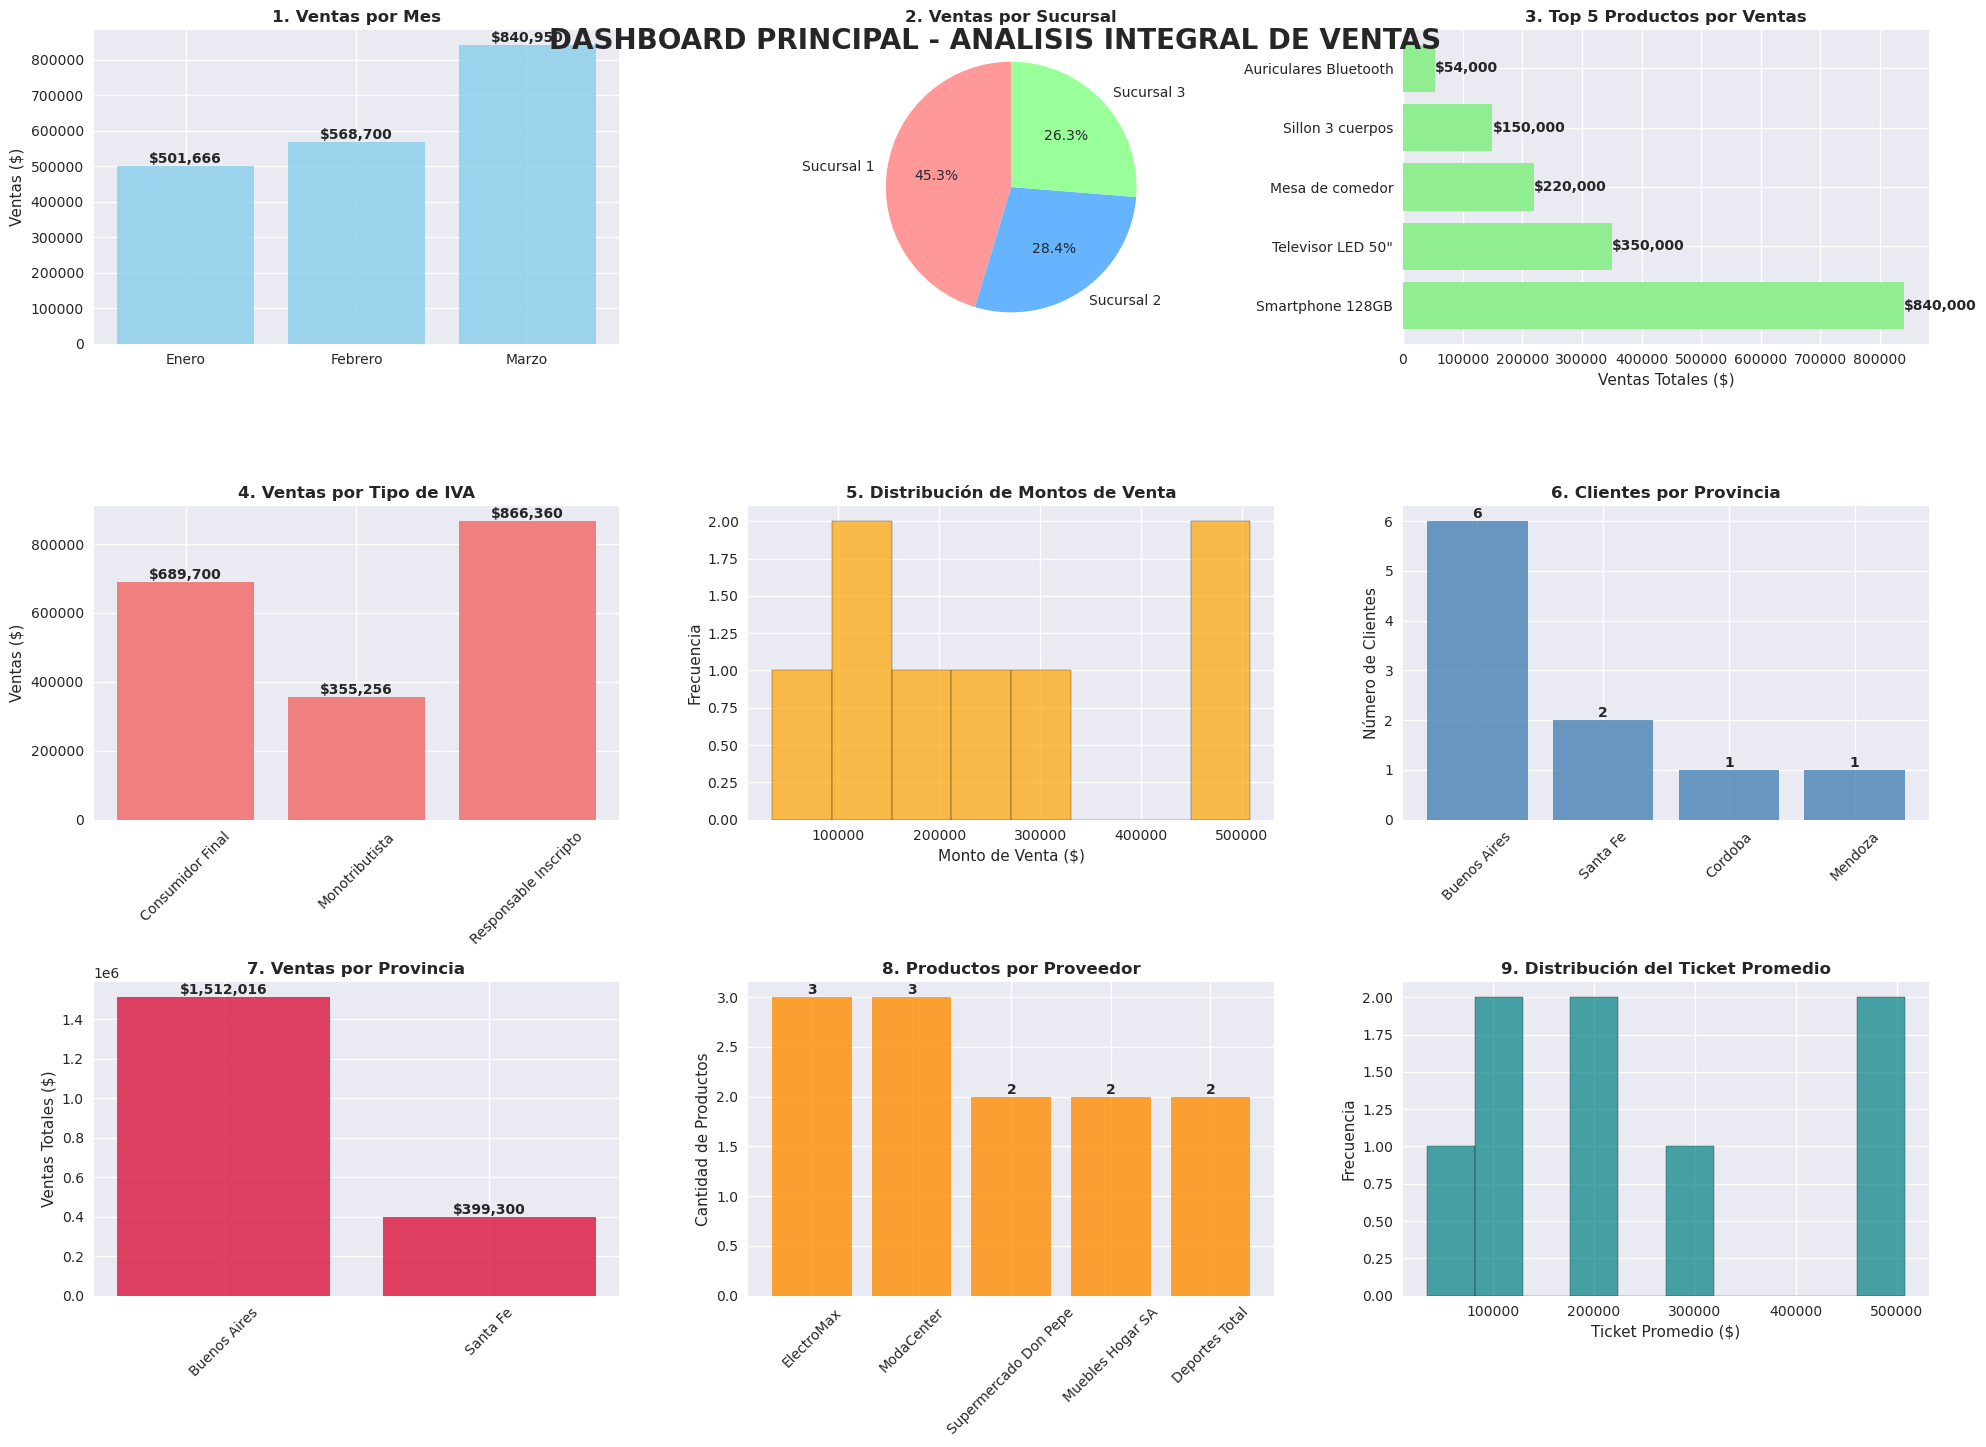


DASHBOARD DE ANALISIS DE PRODUCTOS


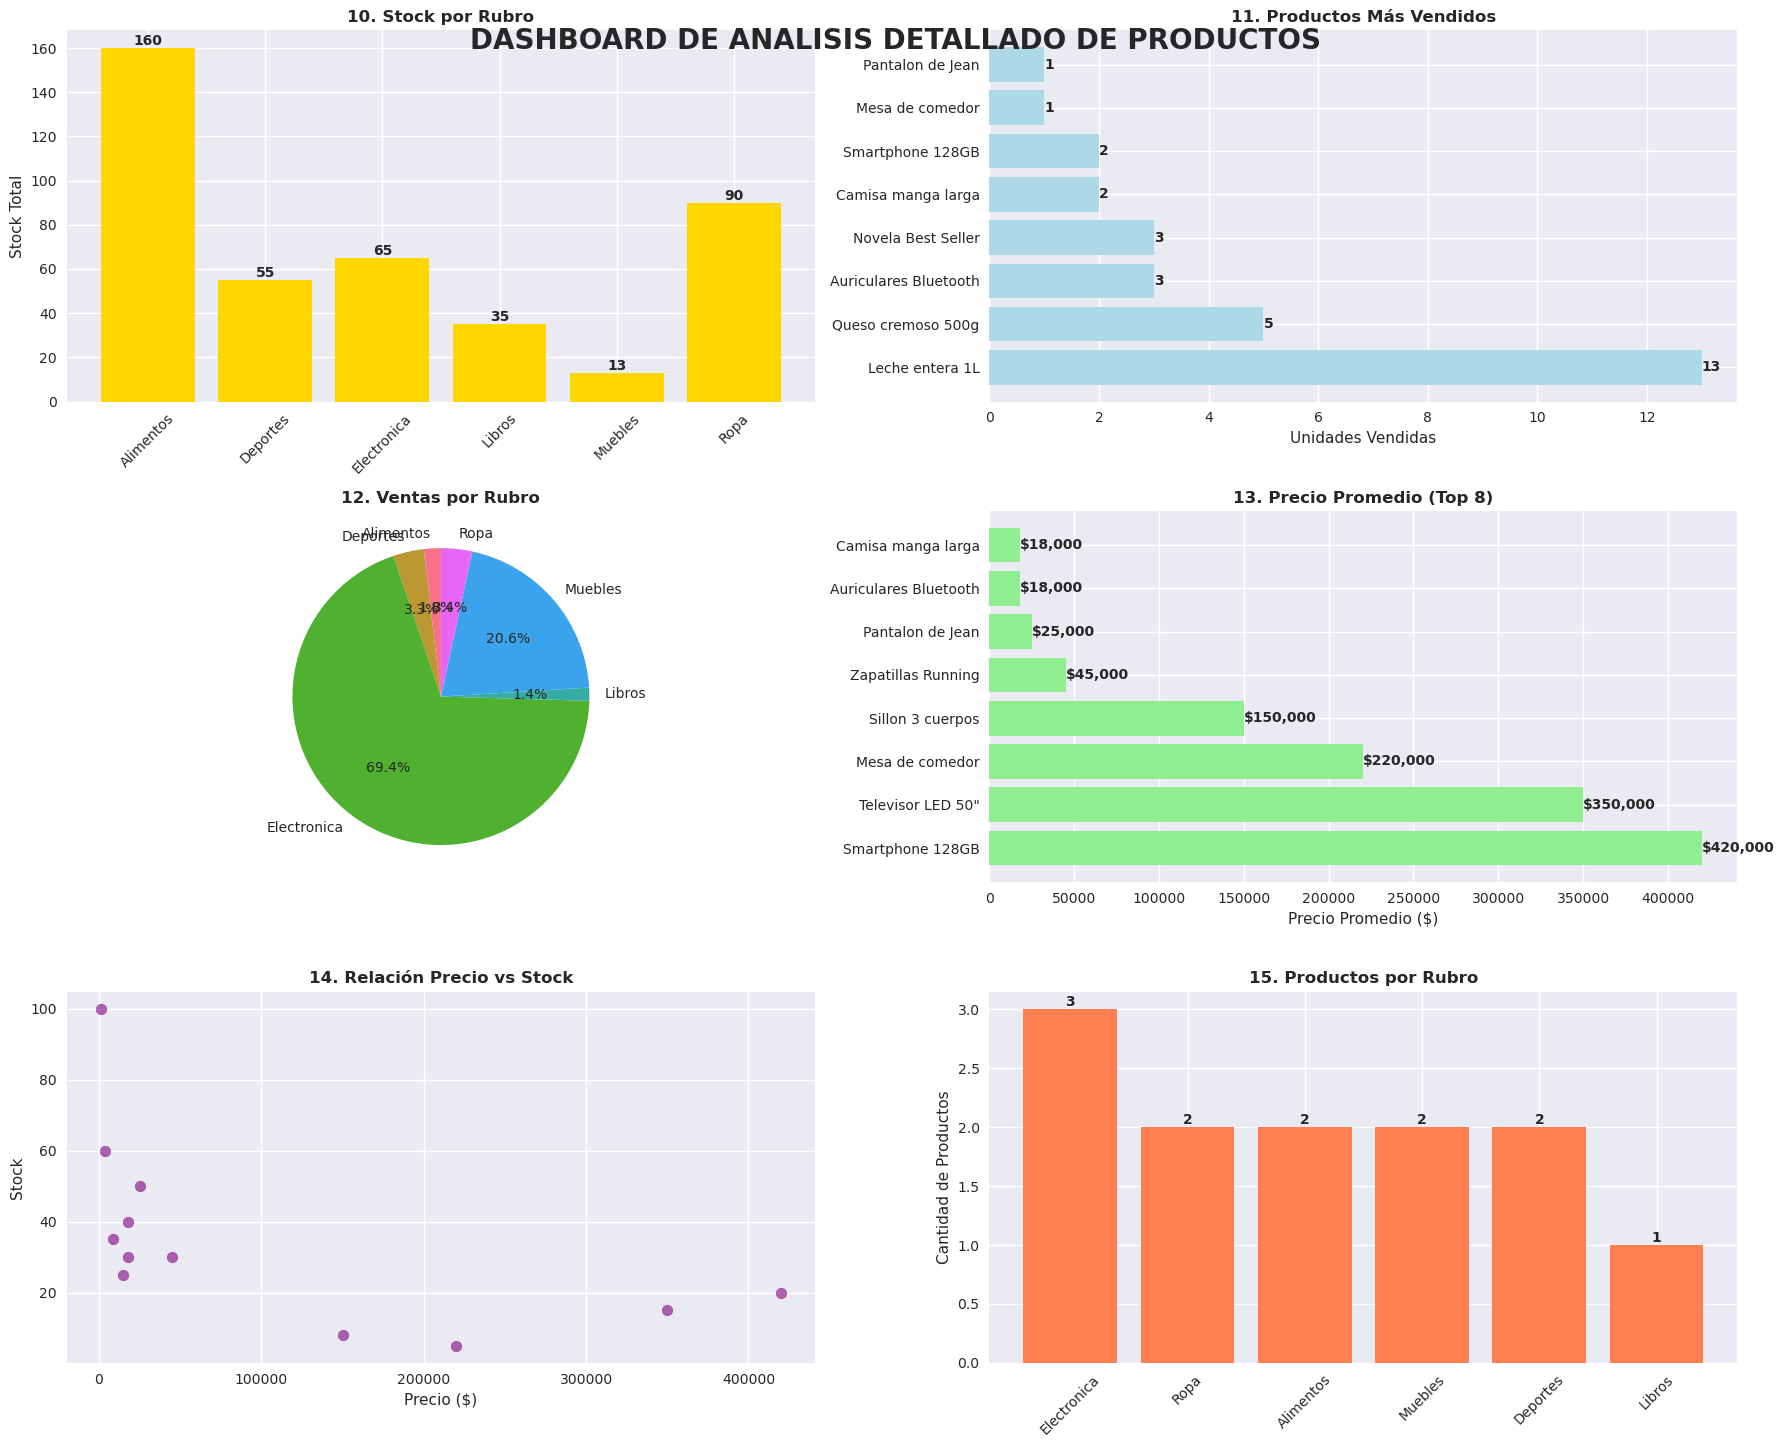


RESUMEN EJECUTIVO


POR VENTAS:
   1. Smartphone 128GB: $840,000.00
   2. Televisor LED 50": $350,000.00
   3. Mesa de comedor: $220,000.00

POR CANTIDAD VENDIDA:
   1. Leche entera 1L: 13 unidades
   2. Queso cremoso 500g: 5 unidades
   3. Auriculares Bluetooth: 3 unidades

RENDIMIENTO POR SUCURSAL:
   Sucursal 1: $866,360.00 (4 ventas)
   Sucursal 2: $542,806.00 (2 ventas)
   Sucursal 3: $502,150.00 (2 ventas)

ANALISIS COMPLETADO


In [3]:
# Proyecto 3 - Análisis de Datos con Visualizaciones
# VERSIÓN PARA JUPYTER NOTEBOOK - SIN EMOJIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# ==============================
# CONFIGURACIÓN PARA JUPYTER
# ==============================
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fuente que soporta mejor caracteres

# Configurar pandas para mostrar más información
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# ==============================
# CARGA DE TODOS LOS ARCHIVOS CSV
# ==============================
print("Cargando todos los archivos CSV...")

# Lista de archivos CSV necesarios
archivos_csv = [
    'clientes.csv', 'productos.csv', 'facturas_encabezado.csv', 'facturas_detalle.csv',
    'rubros.csv', 'sucursales.csv', 'condicion_iva.csv', 'localidades.csv', 
    'provincias.csv', 'proveedores.csv', 'ventas.csv'
]

# Cargar todos los archivos
dataframes = {}
for archivo in archivos_csv:
    try:
        # Intentar cargar desde la carpeta datos
        df = pd.read_csv(f'datos/{archivo}')
        nombre_df = archivo.replace('.csv', '')
        dataframes[nombre_df] = df
        print(f"✅ {archivo} - {len(df)} registros")
    except FileNotFoundError:
        try:
            # Intentar cargar desde el directorio actual
            df = pd.read_csv(archivo)
            nombre_df = archivo.replace('.csv', '')
            dataframes[nombre_df] = df
            print(f"✅ {archivo} - {len(df)} registros")
        except FileNotFoundError:
            print(f"❌ No se pudo cargar {archivo}")

# Asignar a variables individuales
clientes = dataframes['clientes']
productos = dataframes['productos']
facturas_encabezado = dataframes['facturas_encabezado']
facturas_detalle = dataframes['facturas_detalle']
rubros = dataframes['rubros']
sucursales = dataframes['sucursales']
condicion_iva = dataframes['condicion_iva']
localidades = dataframes['localidades']
provincias = dataframes['provincias']
proveedores = dataframes['proveedores']
ventas = dataframes['ventas']

print(f"Total archivos cargados: {len(dataframes)}/11")

# ==============================
# PREPARACIÓN DE DATOS COMPLETA
# ==============================
print("\nPreparando datos con todas las tablas...")

# Renombrar columnas para evitar conflictos
productos_renom = productos.rename(columns={'descripcion': 'nombre_producto'})
rubros_renom = rubros.rename(columns={'descripcion': 'nombre_rubro'})
condicion_iva_renom = condicion_iva.rename(columns={'descripcion': 'tipo_iva'})
provincias_renom = provincias.rename(columns={'nombre': 'nombre_provincia'})
localidades_renom = localidades.rename(columns={'nombre': 'nombre_localidad'})

# Unir localidades con provincias
localidades_completas = localidades_renom.merge(provincias_renom, on='id_provincia', how='left')

# Unir clientes con información geográfica completa
clientes_completos = clientes.merge(localidades_completas, on='id_localidad', how='left')

# Unir productos con proveedores
productos_completos = productos_renom.merge(proveedores, on='id_proveedor', how='left', suffixes=('_producto', '_proveedor'))

# Merge seguro de detalles con productos y rubros
detalles_completos = (facturas_detalle
    .merge(productos_completos, on='id_producto', how='left')
    .merge(rubros_renom, on='id_rubro', how='left')
)

# Merge seguro de facturas con clientes y condición IVA
facturas_completas = (facturas_encabezado
    .merge(clientes_completos, on='id_cliente', how='left')
    .merge(condicion_iva_renom, on='id_condicion_iva', how='left')
    .merge(sucursales, on='id_sucursal', how='left')
)

# Unir con ventas
facturas_completas = facturas_completas.merge(ventas, on='id_factura', how='left')

# Convertir fecha
facturas_encabezado['fecha'] = pd.to_datetime(facturas_encabezado['fecha'])
facturas_completas['fecha'] = pd.to_datetime(facturas_completas['fecha'])

print("Todos los datos preparados correctamente")

# ==============================
# ANÁLISIS BÁSICO COMPLETO
# ==============================
print("\n" + "="*60)
print("ANÁLISIS BÁSICO COMPLETO")
print("="*60)

total_ventas = facturas_encabezado['total_venta'].sum()
total_facturas = len(facturas_encabezado)
total_clientes = len(clientes)

# Mostrar métricas principales
from IPython.display import display, HTML

display(HTML("""
<style>
.metric-card {
    border: 2px solid #4CAF50;
    border-radius: 10px;
    padding: 15px;
    margin: 10px;
    background-color: #f9f9f9;
    text-align: center;
}
.metric-value {
    font-size: 24px;
    font-weight: bold;
    color: #2E7D32;
}
.metric-label {
    font-size: 14px;
    color: #666;
}
</style>
"""))

# Crear métricas visuales
metrics_html = f"""
<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <div class="metric-card">
        <div class="metric-value">${total_ventas:,.2f}</div>
        <div class="metric-label">Ventas Totales</div>
    </div>
    <div class="metric-card">
        <div class="metric-value">{total_facturas}</div>
        <div class="metric-label">Total Facturas</div>
    </div>
    <div class="metric-card">
        <div class="metric-value">{total_clientes}</div>
        <div class="metric-label">Total Clientes</div>
    </div>
    <div class="metric-card">
        <div class="metric-value">{len(productos)}</div>
        <div class="metric-label">Total Productos</div>
    </div>
</div>
"""

display(HTML(metrics_html))

# Información detallada
print(f"\nESTADÍSTICAS DETALLADAS:")
print(f"• Ventas totales: ${total_ventas:,.2f}")
print(f"• Factura promedio: ${facturas_encabezado['total_venta'].mean():,.2f}")
print(f"• Total sucursales: {len(sucursales)}")
print(f"• Total localidades: {len(localidades)}")
print(f"• Total provincias: {len(provincias)}")
print(f"• Total proveedores: {len(proveedores)}")

# ==============================
# DASHBOARD 1: PRINCIPAL (9 gráficos)
# ==============================
print("\n" + "="*60)
print("DASHBOARD PRINCIPAL - ANÁLISIS COMPLETO")
print("="*60)

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('DASHBOARD PRINCIPAL - ANALISIS INTEGRAL DE VENTAS', fontsize=20, fontweight='bold', y=0.95)

# 1. VENTAS POR MES
ventas_mensuales = facturas_encabezado.groupby(facturas_encabezado['fecha'].dt.month)['total_venta'].sum()
meses = ['Enero', 'Febrero', 'Marzo']
ventas_mensuales.index = [meses[i-1] for i in ventas_mensuales.index if i <= len(meses)]
axes[0, 0].bar(ventas_mensuales.index, ventas_mensuales.values, color='skyblue', alpha=0.8)
axes[0, 0].set_title('1. Ventas por Mes', fontweight='bold')
axes[0, 0].set_ylabel('Ventas ($)')
for i, v in enumerate(ventas_mensuales.values):
    axes[0, 0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. VENTAS POR SUCURSAL
ventas_sucursal = facturas_completas.groupby('id_sucursal')['total_venta'].sum()
axes[0, 1].pie(ventas_sucursal.values, labels=[f'Sucursal {i}' for i in ventas_sucursal.index], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0, 1].set_title('2. Ventas por Sucursal', fontweight='bold')

# 3. TOP PRODUCTOS POR VENTAS
ventas_producto = detalles_completos.groupby('nombre_producto')['subtotal_linea'].sum().nlargest(5)
y_pos = range(len(ventas_producto))
axes[0, 2].barh(y_pos, ventas_producto.values, color='lightgreen')
axes[0, 2].set_title('3. Top 5 Productos por Ventas', fontweight='bold')
axes[0, 2].set_xlabel('Ventas Totales ($)')
axes[0, 2].set_yticks(y_pos)
axes[0, 2].set_yticklabels(ventas_producto.index)
for i, v in enumerate(ventas_producto.values):
    axes[0, 2].text(v, i, f'${v:,.0f}', va='center', ha='left', fontweight='bold')

# 4. VENTAS POR TIPO DE IVA
ventas_iva = facturas_completas.groupby('tipo_iva')['total_venta'].sum()
axes[1, 0].bar(ventas_iva.index, ventas_iva.values, color='lightcoral')
axes[1, 0].set_title('4. Ventas por Tipo de IVA', fontweight='bold')
axes[1, 0].set_ylabel('Ventas ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(ventas_iva.values):
    axes[1, 0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 5. DISTRIBUCIÓN DE MONTOS
axes[1, 1].hist(facturas_encabezado['total_venta'], bins=8, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('5. Distribución de Montos de Venta', fontweight='bold')
axes[1, 1].set_xlabel('Monto de Venta ($)')
axes[1, 1].set_ylabel('Frecuencia')

# 6. CLIENTES POR PROVINCIA
clientes_por_provincia = clientes_completos['nombre_provincia'].value_counts()
axes[1, 2].bar(clientes_por_provincia.index, clientes_por_provincia.values, color='steelblue', alpha=0.8)
axes[1, 2].set_title('6. Clientes por Provincia', fontweight='bold')
axes[1, 2].set_ylabel('Número de Clientes')
axes[1, 2].tick_params(axis='x', rotation=45)
for i, v in enumerate(clientes_por_provincia.values):
    axes[1, 2].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# 7. VENTAS POR PROVINCIA
ventas_por_provincia = facturas_completas.groupby('nombre_provincia')['total_venta'].sum()
axes[2, 0].bar(ventas_por_provincia.index, ventas_por_provincia.values, color='crimson', alpha=0.8)
axes[2, 0].set_title('7. Ventas por Provincia', fontweight='bold')
axes[2, 0].set_ylabel('Ventas Totales ($)')
axes[2, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(ventas_por_provincia.values):
    axes[2, 0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 8. PRODUCTOS POR PROVEEDOR
productos_por_proveedor = productos_completos['nombre'].value_counts()
axes[2, 1].bar(productos_por_proveedor.index, productos_por_proveedor.values, color='darkorange', alpha=0.8)
axes[2, 1].set_title('8. Productos por Proveedor', fontweight='bold')
axes[2, 1].set_ylabel('Cantidad de Productos')
axes[2, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(productos_por_proveedor.values):
    axes[2, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# 9. TICKET PROMEDIO
axes[2, 2].hist(facturas_encabezado['total_venta'], bins=10, alpha=0.7, color='teal', edgecolor='black')
axes[2, 2].set_title('9. Distribución del Ticket Promedio', fontweight='bold')
axes[2, 2].set_xlabel('Ticket Promedio ($)')
axes[2, 2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# ==============================
# DASHBOARD 2: ANÁLISIS DE PRODUCTOS (6 gráficos)
# ==============================
print("\n" + "="*60)
print("DASHBOARD DE ANALISIS DE PRODUCTOS")
print("="*60)

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('DASHBOARD DE ANALISIS DETALLADO DE PRODUCTOS', fontsize=20, fontweight='bold', y=0.95)

# 10. STOCK POR RUBRO
stock_rubro = productos_renom.merge(rubros_renom, on='id_rubro').groupby('nombre_rubro')['stock'].sum()
axes[0, 0].bar(stock_rubro.index, stock_rubro.values, color='gold')
axes[0, 0].set_title('10. Stock por Rubro', fontweight='bold')
axes[0, 0].set_ylabel('Stock Total')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(stock_rubro.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# 11. PRODUCTOS MÁS VENDIDOS (CANTIDAD)
cantidad_producto = detalles_completos.groupby('nombre_producto')['cantidad'].sum().nlargest(8)
y_pos = range(len(cantidad_producto))
axes[0, 1].barh(y_pos, cantidad_producto.values, color='lightblue')
axes[0, 1].set_title('11. Productos Más Vendidos', fontweight='bold')
axes[0, 1].set_xlabel('Unidades Vendidas')
axes[0, 1].set_yticks(y_pos)
axes[0, 1].set_yticklabels(cantidad_producto.index)
for i, v in enumerate(cantidad_producto.values):
    axes[0, 1].text(v, i, str(v), va='center', ha='left', fontweight='bold')

# 12. VENTAS POR RUBRO
ventas_rubro = detalles_completos.groupby('nombre_rubro')['subtotal_linea'].sum()
axes[1, 0].pie(ventas_rubro.values, labels=ventas_rubro.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('12. Ventas por Rubro', fontweight='bold')

# 13. PRECIO PROMEDIO POR PRODUCTO
precio_promedio = detalles_completos.groupby('nombre_producto')['precio_unitario'].mean().nlargest(8)
y_pos = range(len(precio_promedio))
axes[1, 1].barh(y_pos, precio_promedio.values, color='lightgreen')
axes[1, 1].set_title('13. Precio Promedio (Top 8)', fontweight='bold')
axes[1, 1].set_xlabel('Precio Promedio ($)')
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(precio_promedio.index)
for i, v in enumerate(precio_promedio.values):
    axes[1, 1].text(v, i, f'${v:,.0f}', va='center', ha='left', fontweight='bold')

# 14. RELACIÓN PRECIO vs STOCK
axes[2, 0].scatter(productos_renom['precio'], productos_renom['stock'], alpha=0.6, color='purple', s=60)
axes[2, 0].set_xlabel('Precio ($)')
axes[2, 0].set_ylabel('Stock')
axes[2, 0].set_title('14. Relación Precio vs Stock', fontweight='bold')

# 15. PRODUCTOS POR RUBRO
productos_por_rubro = productos_renom.merge(rubros_renom, on='id_rubro')['nombre_rubro'].value_counts()
axes[2, 1].bar(productos_por_rubro.index, productos_por_rubro.values, color='coral')
axes[2, 1].set_title('15. Productos por Rubro', fontweight='bold')
axes[2, 1].set_ylabel('Cantidad de Productos')
axes[2, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(productos_por_rubro.values):
    axes[2, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ==============================
# RESUMEN EJECUTIVO
# ==============================
print("\n" + "="*60)
print("RESUMEN EJECUTIVO")
print("="*60)

# Top productos
top_productos_ventas = detalles_completos.groupby('nombre_producto')['subtotal_linea'].sum().nlargest(3)
top_productos_cantidad = detalles_completos.groupby('nombre_producto')['cantidad'].sum().nlargest(3)

display(HTML("""
<h3 style='color: #2E7D32;'>PRODUCTOS DESTACADOS</h3>
"""))

print("POR VENTAS:")
for i, (producto, ventas) in enumerate(top_productos_ventas.items(), 1):
    print(f"   {i}. {producto}: ${ventas:,.2f}")

print("\nPOR CANTIDAD VENDIDA:")
for i, (producto, cantidad) in enumerate(top_productos_cantidad.items(), 1):
    print(f"   {i}. {producto}: {cantidad} unidades")

# Información de sucursales
print(f"\nRENDIMIENTO POR SUCURSAL:")
for sucursal in sorted(facturas_completas['id_sucursal'].unique()):
    ventas_suc = facturas_completas[facturas_completas['id_sucursal'] == sucursal]['total_venta']
    print(f"   Sucursal {sucursal}: ${ventas_suc.sum():,.2f} ({len(ventas_suc)} ventas)")

# ==============================
# CONCLUSIÓN
# ==============================
print("\n" + "="*60)
print("ANALISIS COMPLETADO")
print("="*60)

display(HTML(f"""
<div style='background-color: #e8f5e8; padding: 15px; border-radius: 10px; border-left: 5px solid #4CAF50;'>
    <h3 style='color: #2E7D32; margin-top: 0;'>ANALISIS COMPLETADO EXITOSAMENTE</h3>
    <p><strong>Resumen del analisis:</strong></p>
    <ul>
        <li><strong>15 visualizaciones</strong> generadas en 2 dashboards</li>
        <li><strong>11 archivos CSV</strong> procesados correctamente</li>
        <li><strong>${total_ventas:,.2f}</strong> en ventas totales analizadas</li>
        <li><strong>{total_facturas}</strong> facturas procesadas</li>
        <li><strong>{len(productos)}</strong> productos en inventario</li>
    </ul>
    <p><strong>Areas analizadas:</strong> Ventas, Productos, Clientes, Geografia, Proveedores, IVA</p>
</div>
"""))